In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Загрузка данных, соединение;
2. Переименование столбцов для удобства обработки;
3. EDA. Проверка на дубликаты. Проверка на выбросы. Подготовка данных, нормализация для каждой задачи;
4. Выбор модели для предсказания признака "Модуль упругости при растяжении, ГПа";
5. Выбор модели для предсказания признака "Прочность при растяжении, МПа";
6. Построение НС для предсказания признака "Соотношение матрица-наполнитель". В архитектуру заложить слой нормализации;
7. Сохранение моделей и предобработчиков для дальнейшего применения в web-приложении.

In [31]:
X_bp = pd.read_excel('data/X_bp.xlsx', index_col=0)
X_nup = pd.read_excel('data/X_nup.xlsx', index_col=0)

In [32]:
data = X_bp.join(X_nup)

In [33]:
data

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


Переименование столбцов по первым буквам названий признаков для более удобной дальнейшей обработки

In [34]:
data.columns = [''.join(map(lambda x: x[0].upper(), i.split(',')[0].split(' '))) for i in data.columns]

In [35]:
data

,СМ,П,МУ,КО,СЭГ,ТВ,ПП,МУПР,ППР,ПС,УН,ШН,ПН
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   СМ      1023 non-null   float64
 1   П       1023 non-null   float64
 2   МУ      1023 non-null   float64
 3   КО      1023 non-null   float64
 4   СЭГ     1023 non-null   float64
 5   ТВ      1023 non-null   float64
 6   ПП      1023 non-null   float64
 7   МУПР    1023 non-null   float64
 8   ППР     1023 non-null   float64
 9   ПС      1023 non-null   float64
 10  УН      1023 non-null   int64  
 11  ШН      1023 non-null   float64
 12  ПН      1023 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 144.2 KB


In [37]:
data.describe()

,СМ,П,МУ,КО,СЭГ,ТВ,ПП,МУПР,ППР,ПС,УН,ШН,ПН
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [41]:
data.isna().sum().sum()

0

In [45]:
data.duplicated().sum()

0

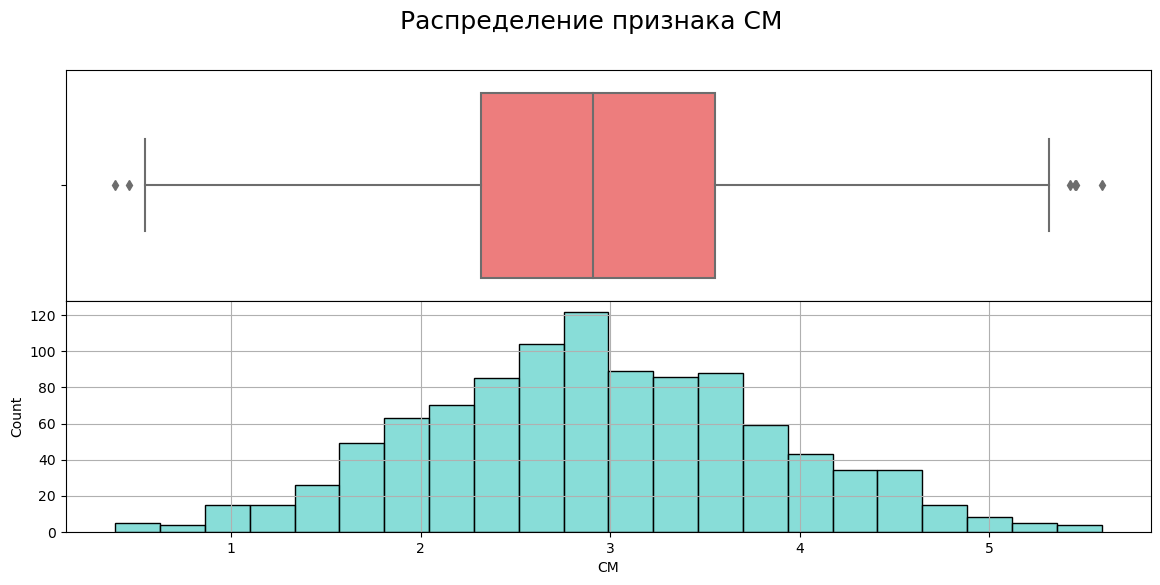

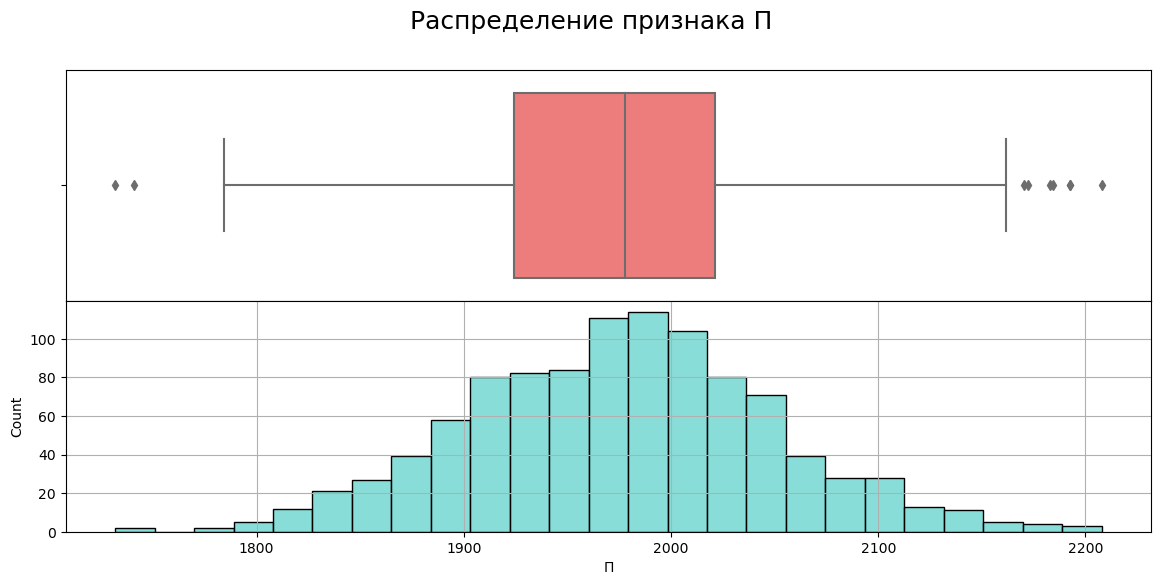

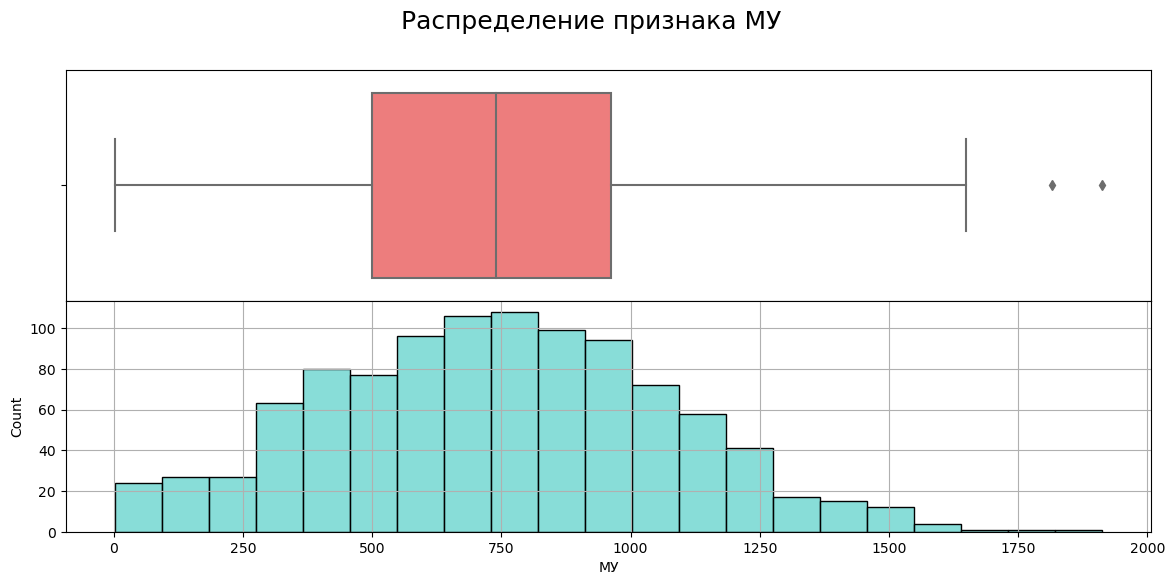

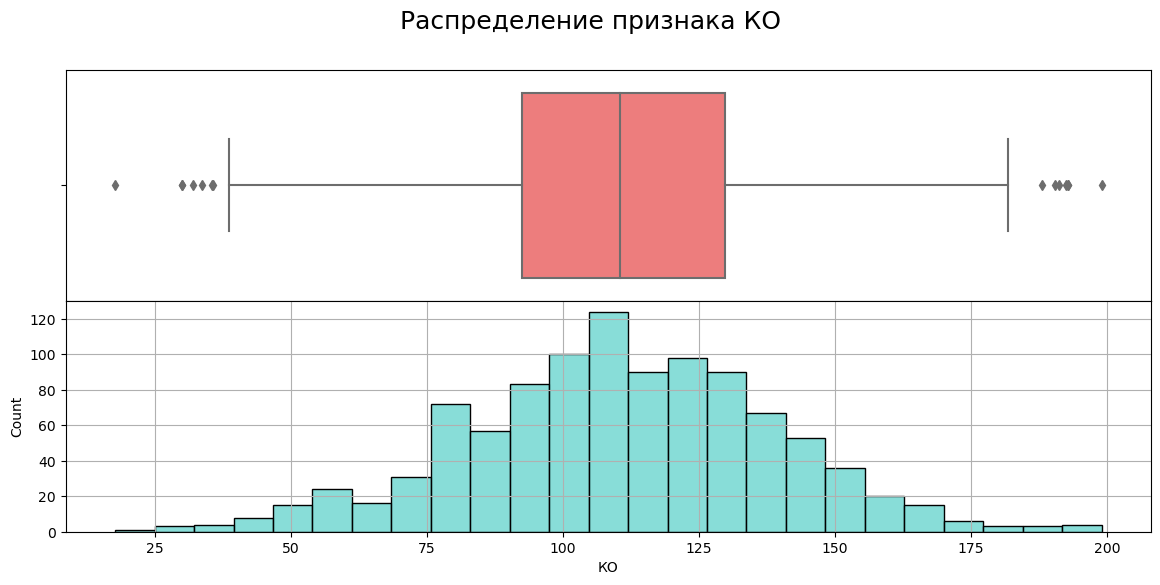

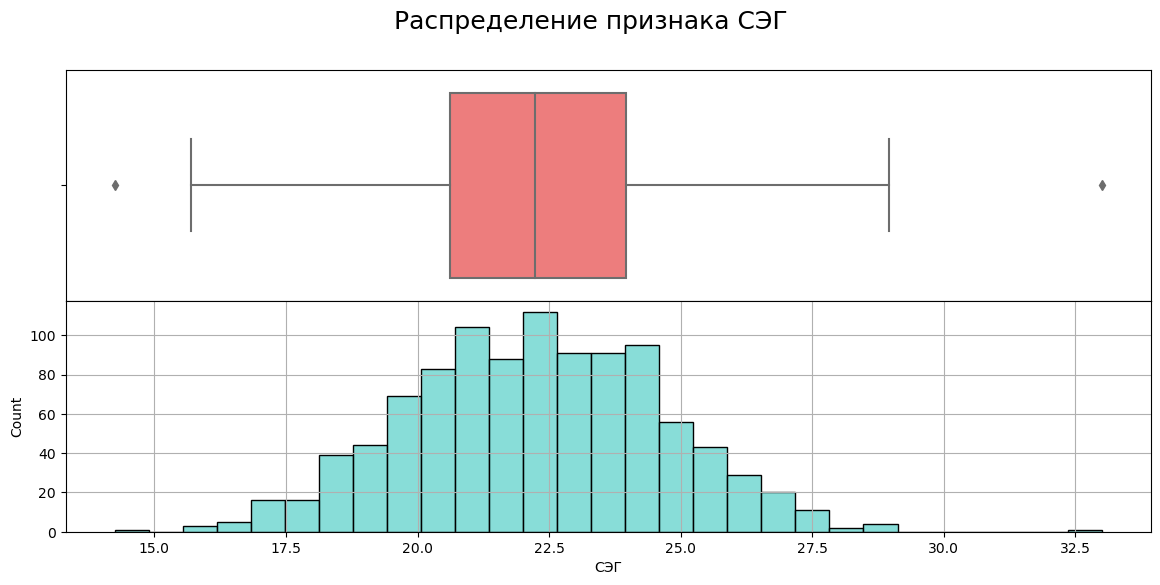

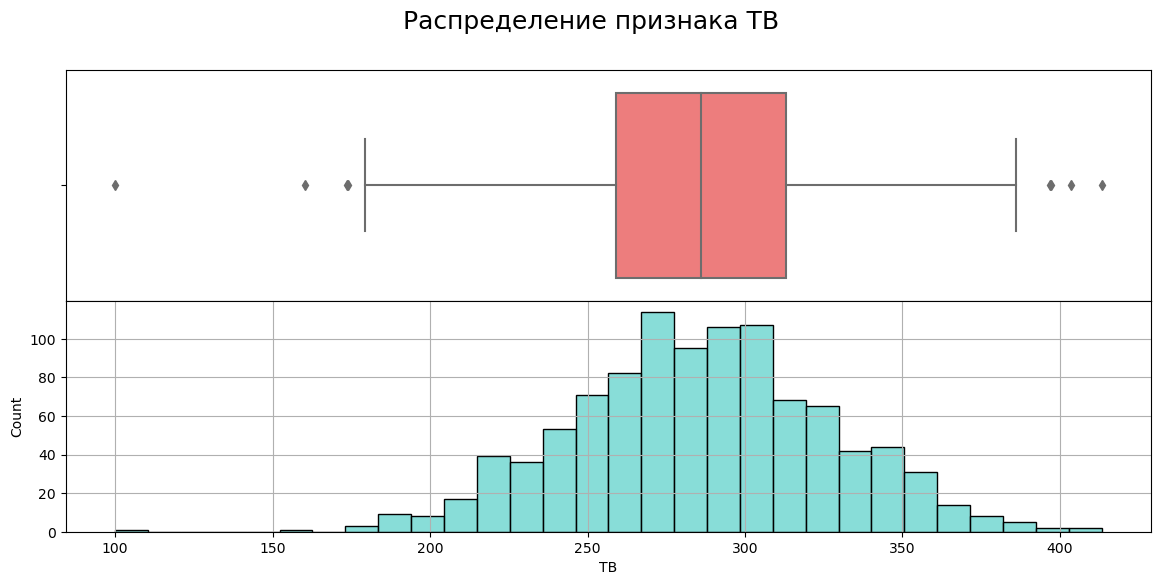

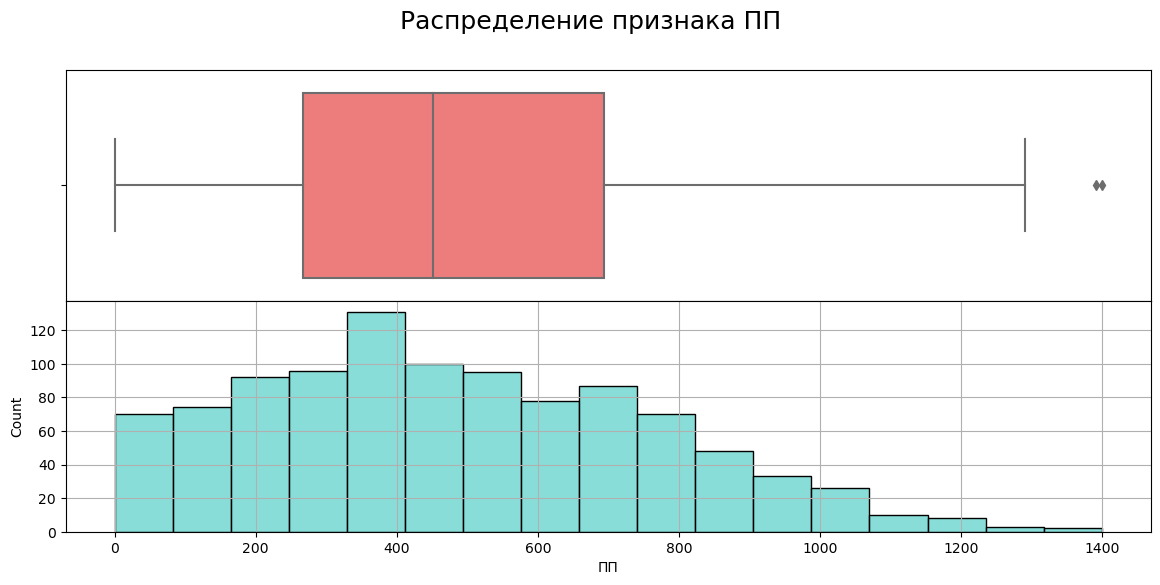

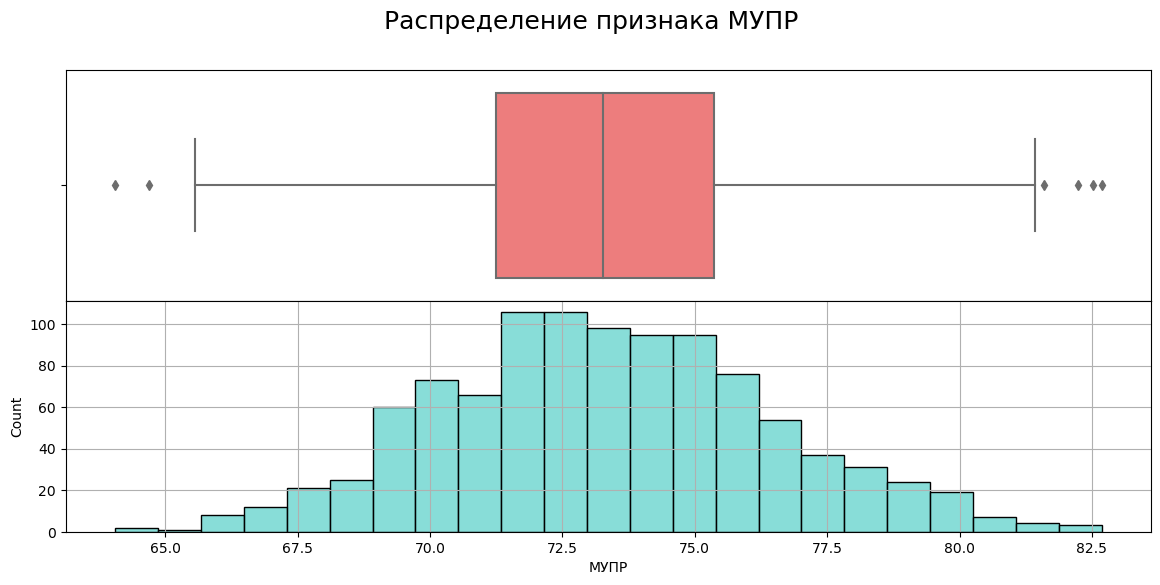

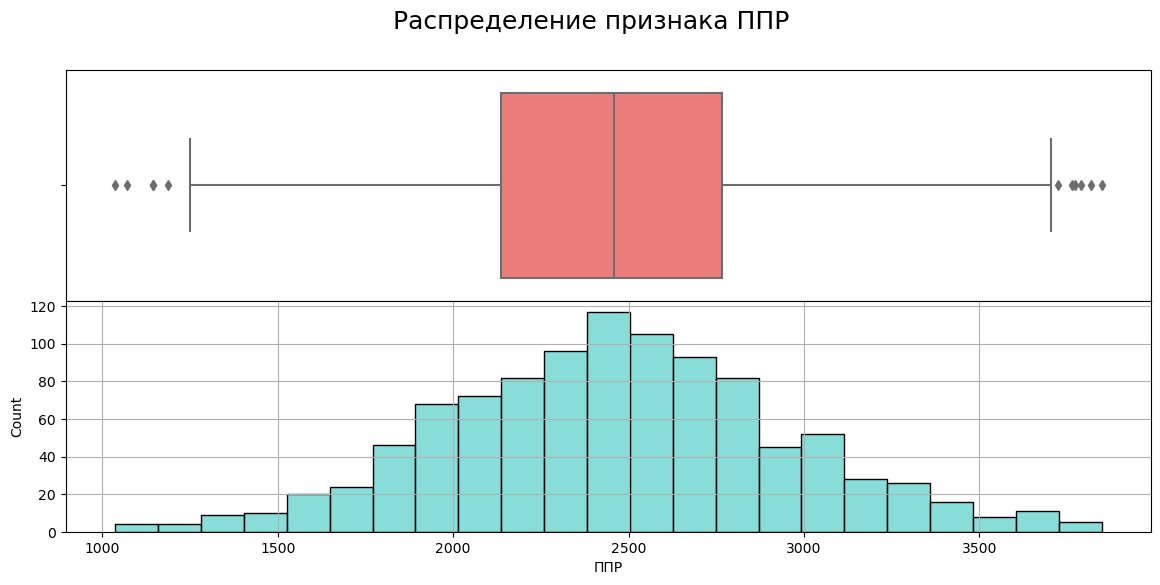

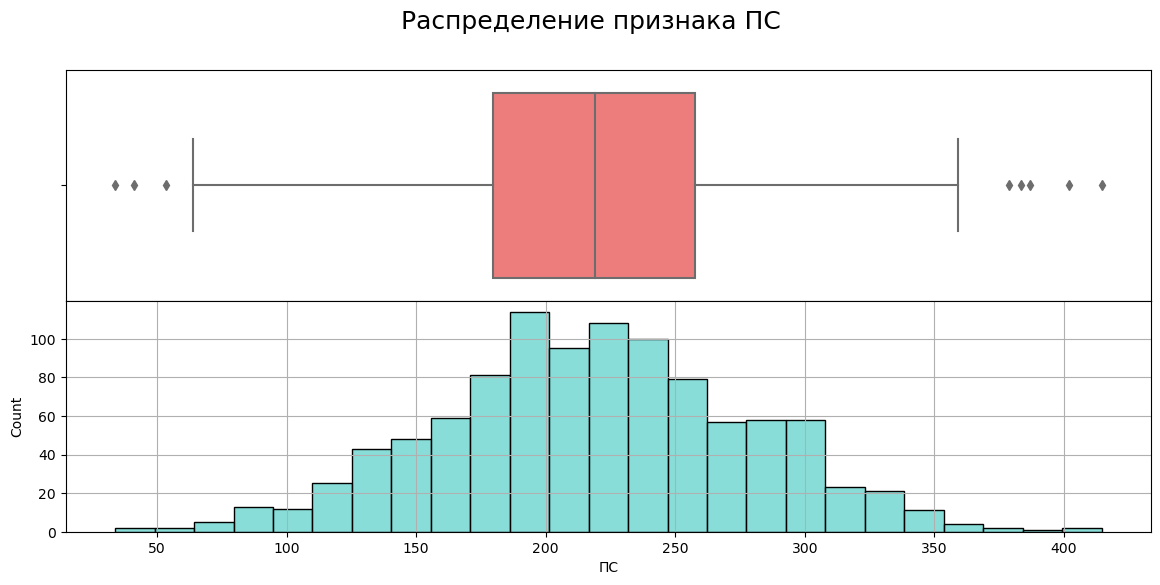

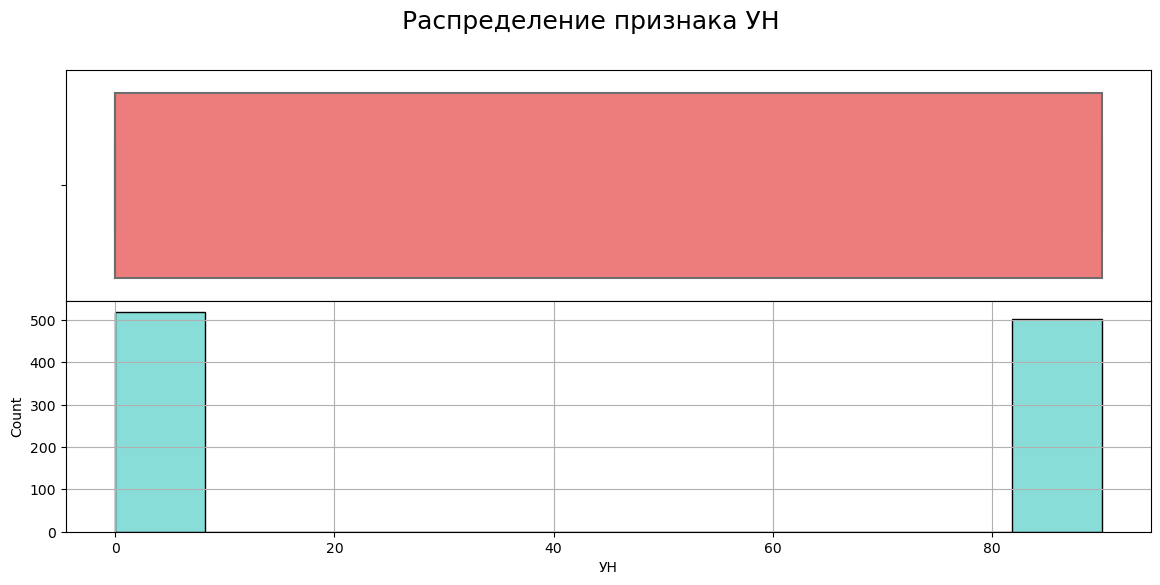

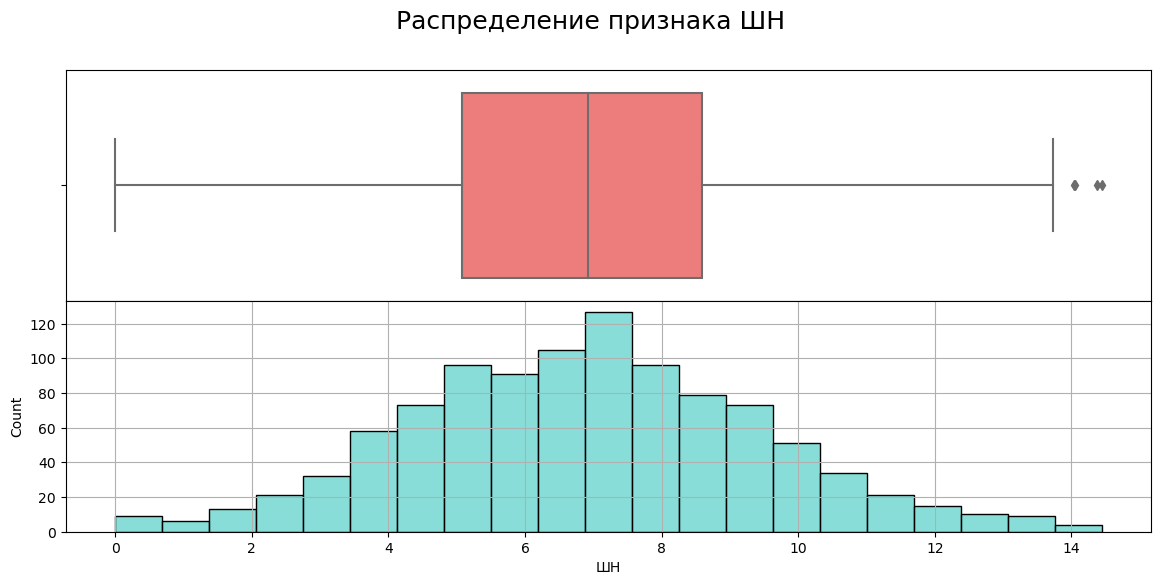

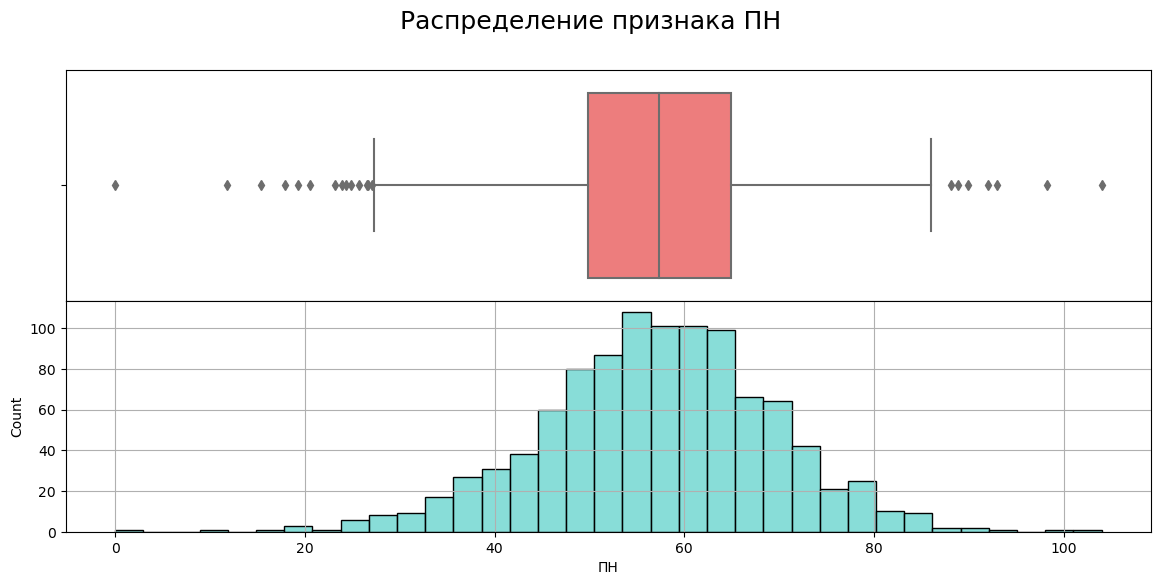

In [38]:
def DistributionPlot(df: pd.DataFrame, column: str, color: list):
    fig, axes = plt.subplots(nrows = 2, ncols=1, figsize=(14,6))
    sns.boxplot(data=df, x=column, ax=axes[0], color=color[0])
    axes[0].set_xlabel(None)
    axes[0].get_xaxis().set_ticks([])
    sns.histplot(data=df, x=column, ax=axes[1], color=color[1])
    plt.subplots_adjust(hspace=0)
    plt.suptitle(f'Распределение признака {column}', fontsize=18)
    plt.grid()
    print()

for col in data.columns:
    DistributionPlot(data, col, ['#FF6B6B', '#60D2CB'])
    
    

<Axes: >

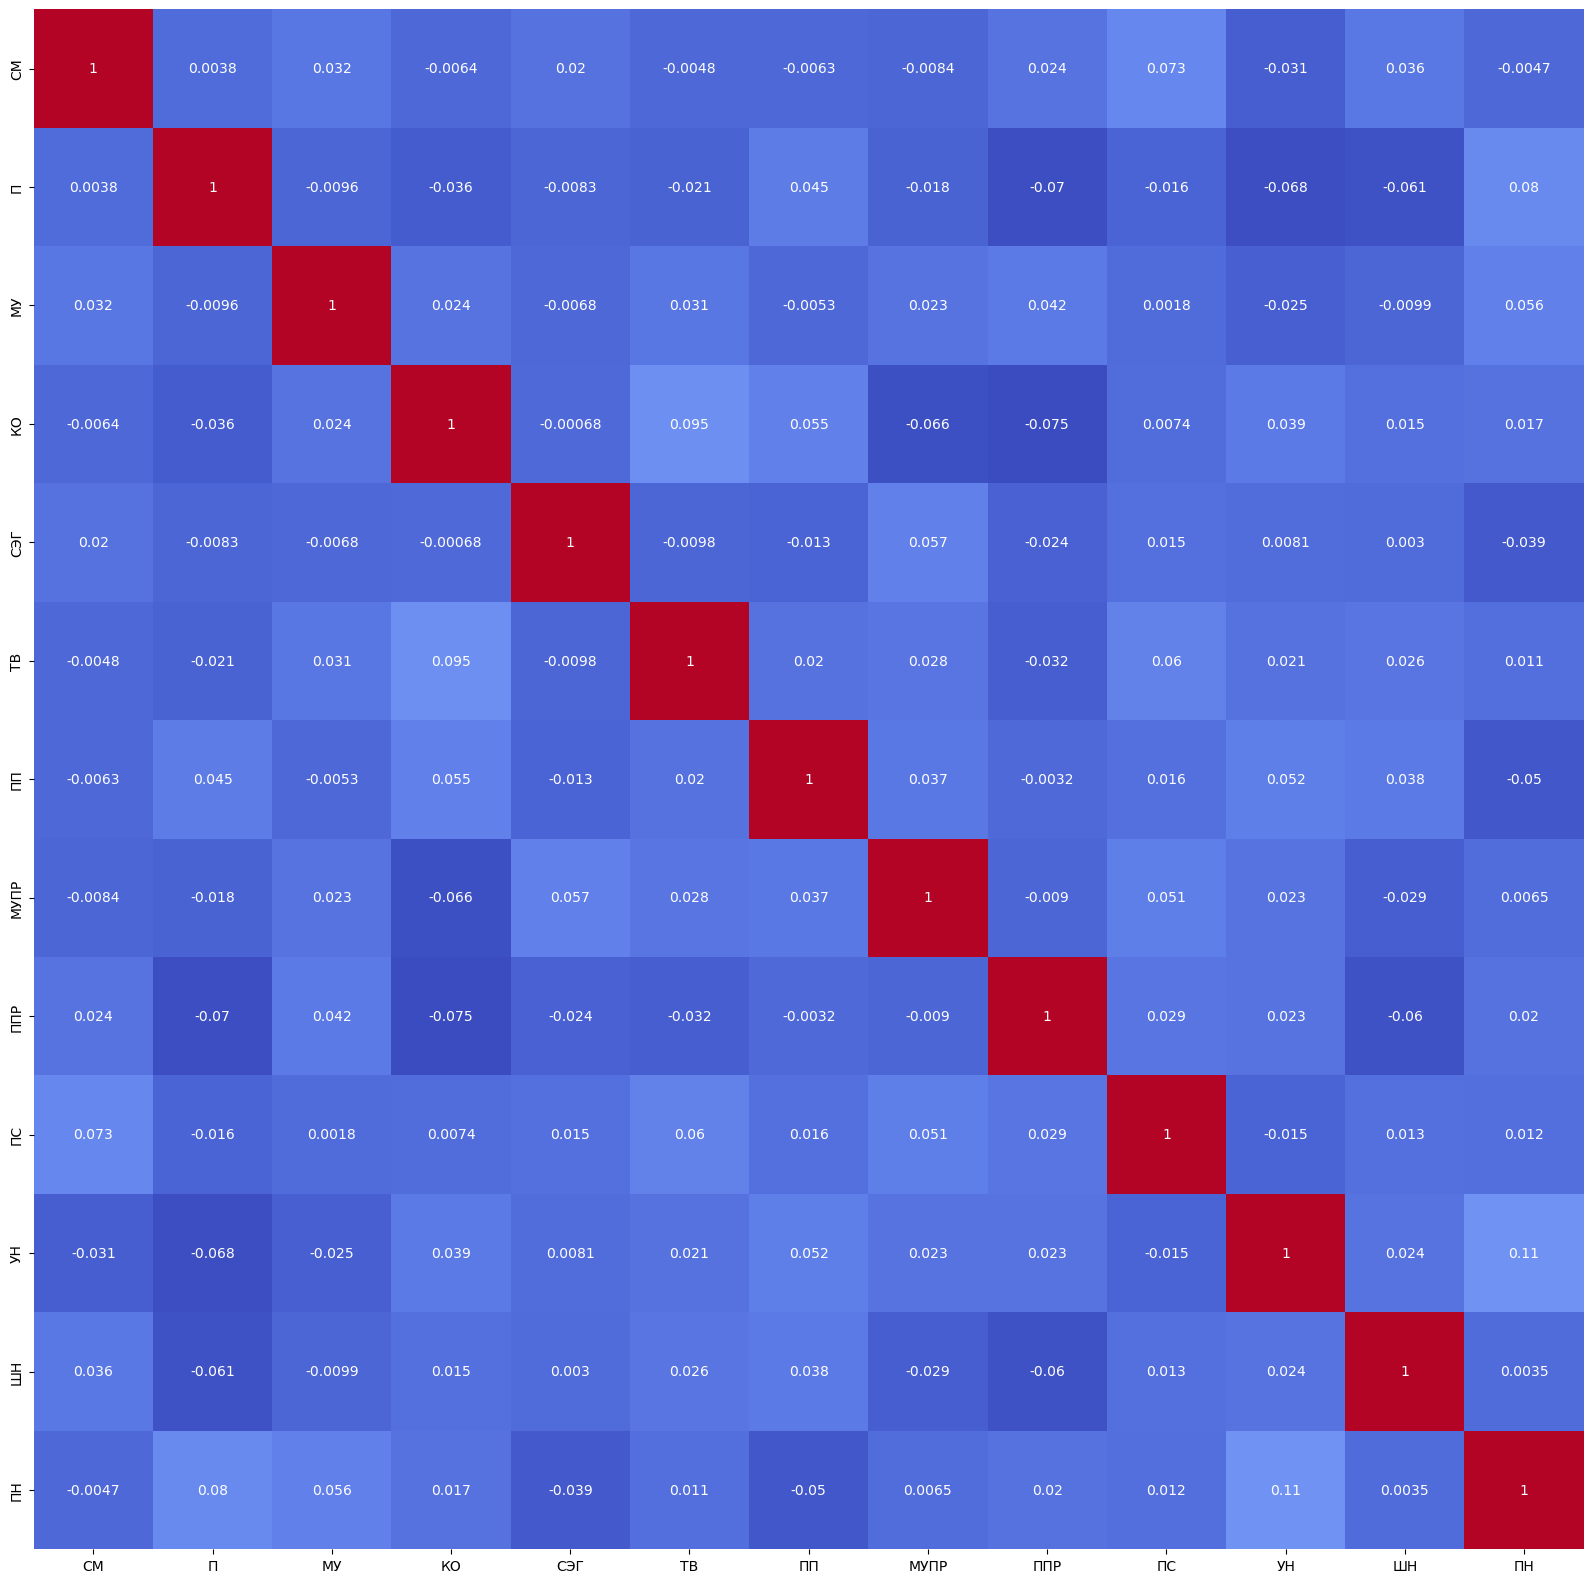

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cbar=False, annot=True, cmap='coolwarm')

In [47]:
y_mupr = data['МУПР']
y_ppr = data['ППР']
y_SM = data['СМ']
dataX = data.drop(['МУПР', 'ППР', 'СМ'], axis=1)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tqdm import tqdm

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataX, y_mupr, test_size=0.2, random_state=3)





In [53]:
def my_best_model(X, y):
    algos = {
        'KNeighborsRegressor': {
            'model' : KNeighborsRegressor(),
            'params' : {
                'n_neighbors' : [3, 5, 7, 9, 11],
                'weights' : ['uniform', 'distance'],
                'p' : [1, 2, 3]
            }
        },
        
        'RandomForestRegressor' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators' : [5,10,15,20,30,50],
                'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                'max_depth' : [None, 5, 10, 20, 30]
            }
        },
        
        'AdaBoostRegressor' : {
            'model' : AdaBoostRegressor(),
            'params' : {
                'n_estimators' : [5, 10, 15, 20, 30, 50],
                'loss' : ['linear', 'square', 'exponential']
            }
        },
        
        'XGBRegressor' : {
            'model' : XGBRegressor(),
            'params' : {
                'n_estimators' : [10, 25, 35, 50,100],
                'learning_rate' : [0.1, 0.2, 0.3, 0.45, 0.6, 0.8]
            }
        }
    }
    
    scores = []
    for algo_name, config in tqdm(algos.items()):
        gs = GridSearchCV(config['model'], config['params'], cv=10, return_train_score=False, scoring='neg_mean_squared_error')
        gs.fit(X, y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
        
    

In [54]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [55]:
res_mupr = my_best_model(X_train, y_train)

100%|██████████| 4/4 [11:19<00:00, 169.93s/it]


In [56]:
res_mupr.sort_values(['best_score']).iloc[-1]

model                                      RandomForestRegressor
best_score                                            -10.525883
best_params    {'criterion': 'friedman_mse', 'max_depth': 5, ...
Name: 1, dtype: object

In [58]:
res_mupr.sort_values(['best_score']).iloc[-1]['best_params']

{'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 30}

In [57]:
res_mupr

,model,best_score,best_params
0,KNeighborsRegressor,-11.217239,"{'n_neighbors': 11, 'p': 1, 'weights': 'distan..."
1,RandomForestRegressor,-10.525883,"{'criterion': 'friedman_mse', 'max_depth': 5, ..."
2,AdaBoostRegressor,-10.561552,"{'loss': 'linear', 'n_estimators': 10}"
3,XGBRegressor,-10.668654,"{'learning_rate': 0.1, 'n_estimators': 10}"


MAE:  2.1771606704328934
MSE:  7.604457663779634
R2:  -25.82921928658092


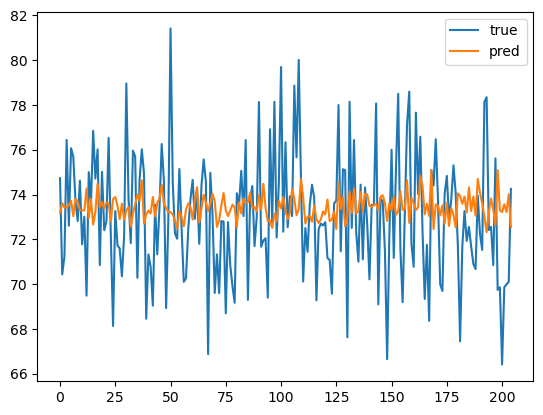

In [71]:
RFG = RandomForestRegressor(criterion = 'friedman_mse', max_depth=5, n_estimators=30)
RFG.fit(X_train, y_train)
print('MAE: ', mean_absolute_error(RFG.predict(X_test), y_test))
print('MSE: ', mean_squared_error(RFG.predict(X_test), y_test))
print('R2: ', r2_score(RFG.predict(X_test), y_test))
plt.plot(y_test.values, label='true')
plt.plot(RFG.predict(X_test), label='pred')
plt.legend()
plt.show()

array([74.7343437 , 70.43892147, 71.2374084 , 76.44694379, 72.61460793,
       76.0722522 , 75.6927677 , 73.71970251, 72.82299971, 74.62868442,
       71.78538174, 73.01527385, 69.49243311, 75.00478588, 73.59789714,
       76.85005829, 74.71883227, 76.02096761, 70.85451981, 75.01714788,
       72.4161637 , 72.81555209, 76.53423466, 72.09861544, 68.14131393,
       73.26880459, 71.73803374, 71.59602746, 70.35658234, 72.14635964,
       78.96069265, 73.80296677, 71.83855196, 75.96637563, 75.70614409,
       70.28764793, 74.67237739, 76.02458913, 74.94321775, 68.46509626,
       71.33136403, 70.77846456, 69.04579841, 73.5502302 , 71.33757199,
       73.4286726 , 76.25966132, 74.62887984, 68.9383679 , 72.8545795 ,
       81.41712594, 74.55539694, 72.271183  , 72.03102502, 75.14748654,
       72.50933189, 70.10841624, 70.27394612, 72.42997594, 73.78117768,
       74.65915915, 72.92252666, 74.20579536, 71.80795485, 74.40494661,
       75.57333351, 74.56647584, 66.88221946, 74.97617919, 73.09

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data, y_ppr, test_size=0.2, random_state=3)

In [73]:
res_ppr = my_best_model(X_train, y_train)

100%|██████████| 4/4 [12:40<00:00, 190.24s/it]


In [74]:
res_ppr

,model,best_score,best_params
0,KNeighborsRegressor,-247108.350926,"{'n_neighbors': 11, 'p': 3, 'weights': 'uniform'}"
1,RandomForestRegressor,-230594.421556,"{'criterion': 'absolute_error', 'max_depth': 5..."
2,AdaBoostRegressor,-228378.353231,"{'loss': 'linear', 'n_estimators': 15}"
3,XGBRegressor,-237604.416643,"{'learning_rate': 0.1, 'n_estimators': 10}"


MAE:  414.3364408254547
MSE:  263958.3421451017
R2:  -38.571191449652666


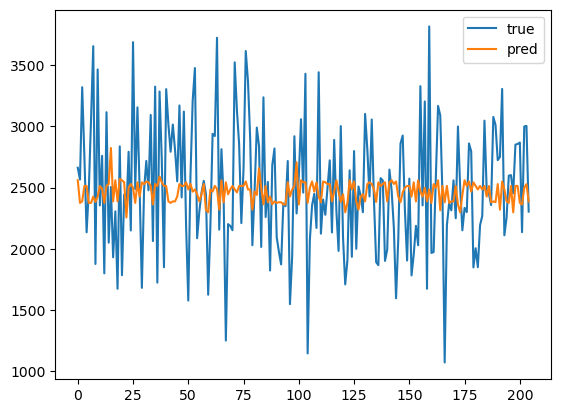

In [83]:
ABR = AdaBoostRegressor(loss='linear', n_estimators=15)
ABR.fit(X_train, y_train)
print('MAE: ', mean_absolute_error(ABR.predict(X_test), y_test))
print('MSE: ', mean_squared_error(ABR.predict(X_test), y_test))
print('R2: ', r2_score(ABR.predict(X_test), y_test))
plt.plot(y_test.values, label='true')
plt.plot(ABR.predict(X_test), label='pred')
plt.legend()
plt.show()

In [84]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [49]:
from keras.models import Sequential
from keras.layers import Dense,  Dropout, BatchNormalization, Normalization

In [52]:
X_train, X_test, y_train, y_test = train_test_split(dataX, y_SM, test_size=0.2, random_state=3)

In [53]:
X_train.shape[1]

10

In [56]:
Norm = Normalization(axis=-1)
Norm.adapt(X_train)

In [57]:
model = Sequential()
model.add(Norm)
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))



In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,838
Trainable params: 2,817
Non-trainable params: 21
___________________________________________________

In [59]:
import keras
from keras.optimizers import adam_v2
optimizer = adam_v2.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [60]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
23/23 - 1s - loss: 8.9860 - mae: 2.8249 - val_loss: 7.3900 - val_mae: 2.5845 - 986ms/epoch - 43ms/step
Epoch 2/100
23/23 - 0s - loss: 7.2184 - mae: 2.5106 - val_loss: 5.6727 - val_mae: 2.2273 - 72ms/epoch - 3ms/step
Epoch 3/100
23/23 - 0s - loss: 5.4434 - mae: 2.1066 - val_loss: 3.6760 - val_mae: 1.7179 - 74ms/epoch - 3ms/step
Epoch 4/100
23/23 - 0s - loss: 3.5257 - mae: 1.6179 - val_loss: 1.6899 - val_mae: 1.0568 - 86ms/epoch - 4ms/step
Epoch 5/100
23/23 - 0s - loss: 1.9403 - mae: 1.1054 - val_loss: 0.8047 - val_mae: 0.7281 - 75ms/epoch - 3ms/step
Epoch 6/100
23/23 - 0s - loss: 1.3456 - mae: 0.9372 - val_loss: 0.7831 - val_mae: 0.7191 - 74ms/epoch - 3ms/step
Epoch 7/100
23/23 - 0s - loss: 1.1523 - mae: 0.8646 - val_loss: 0.8219 - val_mae: 0.7400 - 72ms/epoch - 3ms/step
Epoch 8/100
23/23 - 0s - loss: 1.2617 - mae: 0.8956 - val_loss: 0.7914 - val_mae: 0.7219 - 71ms/epoch - 3ms/step
Epoch 9/100
23/23 - 0s - loss: 1.2579 - mae: 0.9093 - val_loss: 0.7992 - val_mae: 0.7264 - 78m

Epoch 73/100
23/23 - 0s - loss: 0.7613 - mae: 0.7017 - val_loss: 0.7750 - val_mae: 0.7188 - 69ms/epoch - 3ms/step
Epoch 74/100
23/23 - 0s - loss: 0.7791 - mae: 0.7136 - val_loss: 0.7785 - val_mae: 0.7215 - 72ms/epoch - 3ms/step
Epoch 75/100
23/23 - 0s - loss: 0.7714 - mae: 0.7055 - val_loss: 0.7577 - val_mae: 0.7053 - 71ms/epoch - 3ms/step
Epoch 76/100
23/23 - 0s - loss: 0.7806 - mae: 0.7112 - val_loss: 0.7844 - val_mae: 0.7247 - 71ms/epoch - 3ms/step
Epoch 77/100
23/23 - 0s - loss: 0.7820 - mae: 0.7117 - val_loss: 0.7889 - val_mae: 0.7277 - 71ms/epoch - 3ms/step
Epoch 78/100
23/23 - 0s - loss: 0.7674 - mae: 0.7077 - val_loss: 0.7732 - val_mae: 0.7169 - 71ms/epoch - 3ms/step
Epoch 79/100
23/23 - 0s - loss: 0.7553 - mae: 0.6989 - val_loss: 0.7718 - val_mae: 0.7192 - 74ms/epoch - 3ms/step
Epoch 80/100
23/23 - 0s - loss: 0.7525 - mae: 0.6952 - val_loss: 0.7823 - val_mae: 0.7200 - 69ms/epoch - 3ms/step
Epoch 81/100
23/23 - 0s - loss: 0.7699 - mae: 0.7088 - val_loss: 0.7872 - val_mae: 0.723

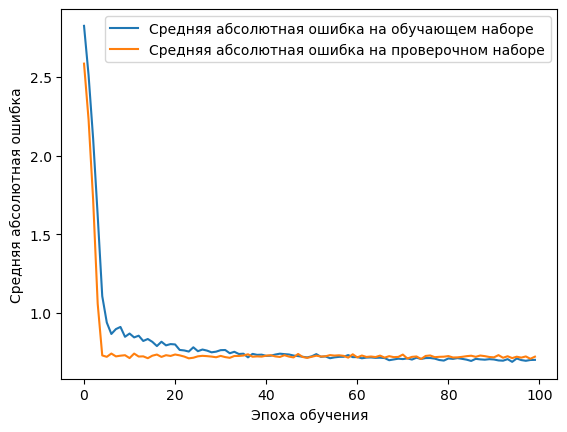

In [61]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [62]:
mean_absolute_error(y_test, model.predict(X_test))

0.7859645631653174

In [53]:
print(np.mean(y_test))
print(np.std(y_test))

2.9596987442205416
0.9542970017388305


Обучим модель снова на 35 эпохах

In [65]:
model = Sequential()
model.add(Norm)
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))

optimizer = adam_v2.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=35, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/35
23/23 - 1s - loss: 8.9514 - mae: 2.8117 - val_loss: 7.1809 - val_mae: 2.5448 - 831ms/epoch - 36ms/step
Epoch 2/35
23/23 - 0s - loss: 7.3548 - mae: 2.5217 - val_loss: 5.6238 - val_mae: 2.2205 - 70ms/epoch - 3ms/step
Epoch 3/35
23/23 - 0s - loss: 5.3896 - mae: 2.1109 - val_loss: 3.5593 - val_mae: 1.6929 - 70ms/epoch - 3ms/step
Epoch 4/35
23/23 - 0s - loss: 3.3319 - mae: 1.5556 - val_loss: 1.6533 - val_mae: 1.0428 - 71ms/epoch - 3ms/step
Epoch 5/35
23/23 - 0s - loss: 1.9669 - mae: 1.1238 - val_loss: 0.8416 - val_mae: 0.7407 - 71ms/epoch - 3ms/step
Epoch 6/35
23/23 - 0s - loss: 1.4077 - mae: 0.9357 - val_loss: 0.8477 - val_mae: 0.7493 - 72ms/epoch - 3ms/step
Epoch 7/35
23/23 - 0s - loss: 1.2758 - mae: 0.8909 - val_loss: 0.8180 - val_mae: 0.7344 - 73ms/epoch - 3ms/step
Epoch 8/35
23/23 - 0s - loss: 1.2375 - mae: 0.8986 - val_loss: 0.8292 - val_mae: 0.7422 - 71ms/epoch - 3ms/step
Epoch 9/35
23/23 - 0s - loss: 1.2598 - mae: 0.8980 - val_loss: 0.8385 - val_mae: 0.7443 - 70ms/epoch -

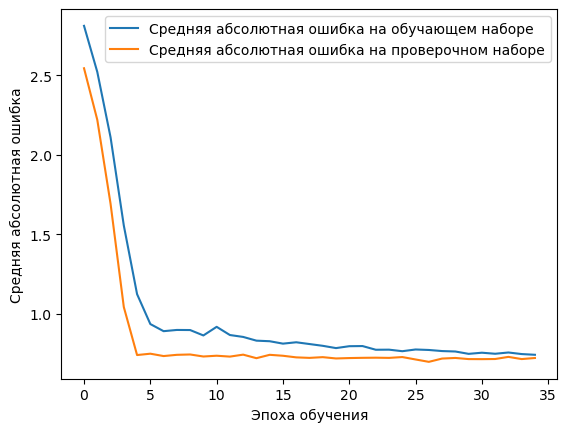

In [66]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [67]:
mean_absolute_error(y_test, model.predict(X_test))

0.7715000684974667

Модель достигла среднего абсолютного отклонения 0.77 (Проверить другие метрики).

Сохраним модель для дальнейшего применения в приложении

Возможно стоит попробовать удалить выбросы 

In [70]:
model.save('model/matmod')

INFO:tensorflow:Assets written to: model/matmod\assets


In [71]:
modeltest = keras.models.load_model('model/matmod')

In [72]:
modeltest.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,838
Trainable params: 2,817
Non-trainable params: 21
___________________________________________________

In [73]:
mean_absolute_error(y_test, modeltest.predict(X_test))

0.7715000684974667